In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import files
# files.upload()  #this will prompt you to upload the kaggle.json

# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json  # set permission


In [ ]:
# !kaggle datasets download -d iabhishekofficial/mobile-price-classification -p '/content/drive/MyDrive/Mobile Price Classification/'

In [ ]:
# !unzip '/content/drive/MyDrive/Mobile Price Classification/mobile-price-classification.zip' -d '/content/drive/MyDrive/Mobile Price Classification/'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Mobile Price Classification/train.csv')
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


# Pre Process

In [ ]:
 for i in dataset.columns:
   print(i, dataset[i].isna().sum())

battery_power 0
blue 0
clock_speed 0
dual_sim 0
fc 0
four_g 0
int_memory 0
m_dep 0
mobile_wt 0
n_cores 0
pc 0
px_height 0
px_width 0
ram 0
sc_h 0
sc_w 0
talk_time 0
three_g 0
touch_screen 0
wifi 0
price_range 0


In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['price_range'], axis=1)
y = dataset['price_range']


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X[X.columns] = sc.fit_transform(X[X.columns])
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regresssion

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict_test = logisticRegr.predict(X_test[0:10])
print('y:   ', list(y_test[0:10]))
print('pred:', list(predict_test))

y:    [3, 0, 2, 2, 2, 0, 0, 3, 3, 1]
pred: [3, 0, 2, 2, 3, 0, 0, 3, 3, 1]


In [ ]:
score = logisticRegr.score(X_test, y_test)
print(score)


0.955


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

percision, recall, f1score, support = precision_recall_fscore_support(y_test, logisticRegr.predict(X_test))
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)


percision: [0.97894737 0.94444444 0.93814433 0.95762712]
recall: [0.97894737 0.92391304 0.91919192 0.99122807]
f1score: [0.97894737 0.93406593 0.92857143 0.97413793]


Text(0, 0.5, 'count')

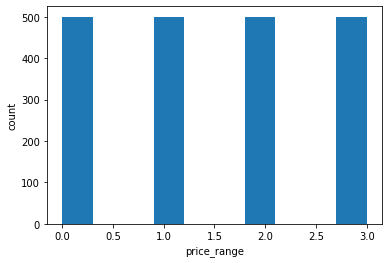

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y)
plt.xlabel('price_range')
plt.ylabel('count')


# Forward Selection

In [ ]:
from sklearn.metrics import auc

def forward_selection(X, y):
  features = []
  final_features = {'features': [], 'scores': []}
  rem_features = X.columns
  for i in range(len(X.columns)):
    max_score = 0
    best_feature = ""
    best_score = 0
    for feature in rem_features:
      new_X = X[features + [feature]]
      X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)
      logisticRegr = LogisticRegression()
      logisticRegr.fit(X_train, y_train)
      score = logisticRegr.score(X_test, y_test)
      if score > max_score :
        max_score = score
        best_feature = feature
        best_score = score
    rem_features = rem_features.drop(best_feature)
    features.append(best_feature)

    final_features['features'].append(best_feature)
    final_features['scores'].append(best_score)
  final_features['features_rank'] = range(len(X.columns))

  best_index = 0
  mx_feature = 0
  for i in range(len(final_features['scores'])):
    if final_features['scores'][i] > mx_feature:
      mx_feature = final_features['scores'][i] 
      best_index = i

  final_features['best_features'] = final_features['features'][:best_index]
  return final_features

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Mobile Price Classification/train.csv')

X = dataset.drop(['price_range'], axis=1)
y = dataset['price_range']

sc = StandardScaler()
X[X.columns] = sc.fit_transform(X[X.columns])


In [ ]:
fs = forward_selection(X, y)


{'features': ['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt', 'dual_sim', 'sc_h', 'pc', 'talk_time', 'wifi', 'sc_w', 'fc', 'blue', 'int_memory', 'three_g', 'four_g', 'm_dep', 'n_cores', 'clock_speed', 'touch_screen'], 'scores': [0.7725, 0.8225, 0.9125, 0.95, 0.975, 0.98, 0.9825, 0.98, 0.98, 0.98, 0.98, 0.9825, 0.975, 0.9725, 0.975, 0.97, 0.97, 0.97, 0.9675, 0.955], 'features_rank': range(0, 20), 'best_features': ['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt', 'dual_sim']}


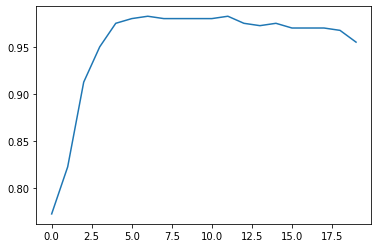

In [ ]:
plt.plot(fs['features_rank'], fs['scores'])

In [ ]:
best_features = fs['best_features']
best_features

['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt', 'dual_sim']

In [ ]:
X = X[best_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

predict_test = logisticRegr.predict(X_test[0:10])
print('y:   ', list(y_test[0:10]))
print('pred:', list(predict_test))

score = logisticRegr.score(X_test, y_test)
print('score', score)

percision, recall, f1score, support = precision_recall_fscore_support(y_test, logisticRegr.predict(X_test))
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

y:    [3, 0, 2, 2, 2, 0, 0, 3, 3, 1]
pred: [3, 0, 2, 2, 2, 0, 0, 3, 3, 1]
score 0.98
percision: [0.97894737 0.94736842 0.98969072 1.        ]
recall: [0.97894737 0.97826087 0.96969697 0.99122807]
f1score: [0.97894737 0.96256684 0.97959184 0.99559471]


# PCA

In [ ]:
from sklearn.decomposition import PCA

X = dataset.drop(['price_range'], axis=1)
y = dataset['price_range']
pca = PCA(n_components=6)
X = pca.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train, y_train)

predict_test = logisticRegr.predict(X_test[0:10])
print('y:   ', list(y_test[0:10]))
print('pred:', list(predict_test))

score = logisticRegr.score(X_test, y_test)
print('score', score)

percision, recall, f1score, support = precision_recall_fscore_support(y_test, logisticRegr.predict(X_test))
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

y:    [3, 0, 2, 2, 2, 0, 0, 3, 3, 1]
pred: [3, 0, 2, 2, 2, 0, 0, 3, 3, 1]
score 0.98
percision: [0.98958333 0.97849462 0.96938776 0.98230088]
recall: [1.         0.98913043 0.95959596 0.97368421]
f1score: [0.9947644  0.98378378 0.96446701 0.97797357]


# Backward Selection

In [ ]:
from sklearn.metrics import auc

def backward_selection(X, y):
  features = X.columns
  final_features = {'features': [], 'scores': []}
  rem_features = X.columns
  for i in range(len(X.columns)):
    max_score = 0
    worst_feature = ""
    worst_score = 0
    for feature in rem_features:
      new_X = X[features.drop(feature)]
      X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)
      logisticRegr = LogisticRegression()
      logisticRegr.fit(X_train, y_train)
      score = logisticRegr.score(X_test, y_test)
      if score > max_score :
        max_score = score
        worst_feature = feature
        worst_score = score
    rem_features = rem_features.drop(worst_feature)
    features.drop(worst_feature)

    final_features['features'].append(worst_feature)
    final_features['scores'].append(worst_score)
  final_features['features_rank'] = range(len(X.columns))

  
  return final_features

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Mobile Price Classification/train.csv')

X = dataset.drop(['price_range'], axis=1)
y = dataset['price_range']

sc = StandardScaler()
X[X.columns] = sc.fit_transform(X[X.columns])


In [ ]:
bs = backward_selection(X, y)
bs

{'best_features': ['touch_screen',
  'int_memory',
  'clock_speed',
  'dual_sim',
  'fc',
  'm_dep',
  'n_cores',
  'pc',
  'sc_w',
  'talk_time',
  'blue',
  'sc_h',
  'three_g',
  'four_g',
  'wifi'],
 'features': ['touch_screen',
  'int_memory',
  'clock_speed',
  'dual_sim',
  'fc',
  'm_dep',
  'n_cores',
  'pc',
  'sc_w',
  'talk_time',
  'blue',
  'sc_h',
  'three_g',
  'four_g',
  'wifi',
  'mobile_wt',
  'px_height',
  'px_width',
  'battery_power',
  'ram'],
 'features_rank': range(0, 20),
 'scores': [0.9675,
  0.9625,
  0.96,
  0.96,
  0.96,
  0.96,
  0.9575,
  0.9575,
  0.955,
  0.955,
  0.9525,
  0.9525,
  0.9525,
  0.95,
  0.9475,
  0.9425,
  0.9025,
  0.9025,
  0.8325,
  0.33]}

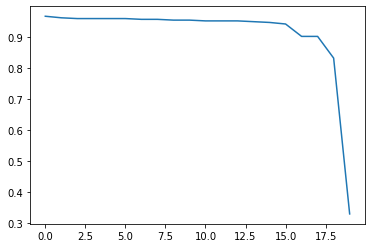

In [ ]:
plt.plot(bs['features_rank'], bs['scores'])

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Mobile Price Classification/train.csv')

X = dataset.drop(['price_range'], axis=1)
y = dataset['price_range']

best_features = []
for i in bs['features'][13:]:
  best_features.append(i.strip())
X = X[best_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logisticRegr = LogisticRegression(max_iter=20000)
logisticRegr.fit(X_train, y_train)

predict_test = logisticRegr.predict(X_test[0:10])
print('y:   ', list(y_test[0:10]))
print('pred:', list(predict_test))

score = logisticRegr.score(X_test, y_test)
print('score', score)

percision, recall, f1score, support = precision_recall_fscore_support(y_test, logisticRegr.predict(X_test))
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

y:    [3, 0, 2, 2, 2, 0, 0, 3, 3, 1]
pred: [3, 0, 2, 2, 2, 0, 0, 3, 3, 1]
score 0.9775
percision: [0.97916667 0.97752809 0.96039604 0.99122807]
recall: [0.98947368 0.94565217 0.97979798 0.99122807]
f1score: [0.98429319 0.96132597 0.97       0.99122807]
